In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('solarpower.zip')

In [14]:
data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [13]:
data[data['cum_power']==-1].count()

date         2
cum_power    2
dtype: int64

In [27]:
data['cum_power'].mean()

23775.573795180724

In [23]:
data.tail()

,date,cum_power
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0
663,2018-10-26,28120.0


In [44]:
data_new  = data.copy()
data_new['cum_power'].mean()


for i in list(range(data_new.shape[0])):
    if data_new['cum_power'][i] == -1:
        data_new['cum_power'][i] = (data_new['cum_power'][i + 1] + data_new['cum_power'][i - 1]) / 2

print(data_new['cum_power'].mean())

data_new[data_new['cum_power']==-1].count()
    

23848.246987951807


C:\Users\пользователь\AppData\Local\Temp\ipykernel_2160\939881341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['cum_power'][i] = (data_new['cum_power'][i + 1] + data_new['cum_power'][i - 1]) / 2


date         0
cum_power    0
dtype: int64

In [47]:
import numpy as np

data_new['day_power']=data_new['cum_power'].diff()

data_new.head()

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


In [56]:
data_new['date_new'] = pd.to_datetime(data_new['date'], dayfirst=True)
data_new['date_new'] = data_new['date_new'].dt.to_period('m')


data_new.head()

data_new.groupby(by='date_new')['day_power'].mean()


date_new
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

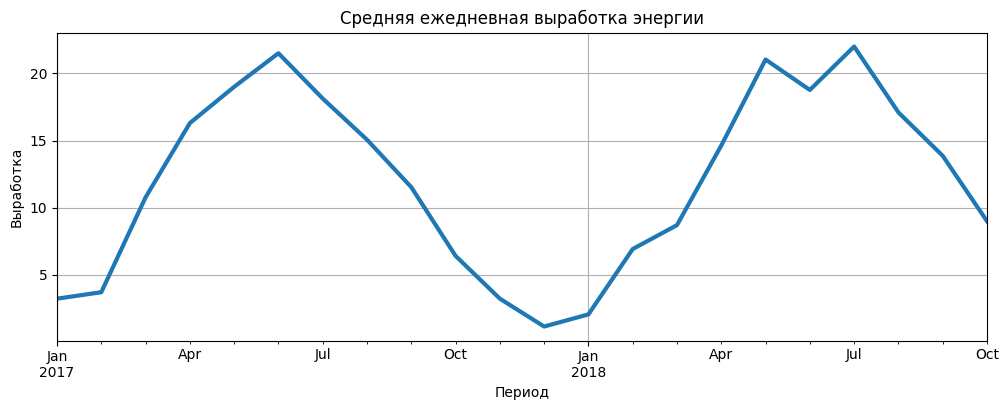

In [59]:
day_power = data_new.groupby(by='date_new')['day_power'].mean()
day_power.plot(
    kind='line',
    figsize=(12, 4),
    title='Средняя ежедневная выработка энергии',
    grid = True,
    lw=3,
    ylabel = 'Выработка',
    xlabel = 'Период'
);